### K vecinos más cercanos KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'h:\\Ejercicios Python\\CERTIFICADO IBM'

In [3]:
cd H:\Curso IBM sobre IA\Archivos para Data Science

H:\Curso IBM sobre IA\Archivos para Data Science


h:\Ejercicios Python\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
pwd

'H:\\Curso IBM sobre IA\\Archivos para Data Science'

In [7]:
dataframe = pd.read_csv('vehiculos.csv')

In [9]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [10]:
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [11]:
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
predicciones = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [20]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [21]:
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [22]:
tasa_error

[np.float64(0.35826771653543305),
 np.float64(0.3464566929133858),
 np.float64(0.3188976377952756),
 np.float64(0.3228346456692913),
 np.float64(0.33858267716535434),
 np.float64(0.3346456692913386),
 np.float64(0.3228346456692913),
 np.float64(0.33858267716535434),
 np.float64(0.36220472440944884),
 np.float64(0.3661417322834646),
 np.float64(0.35039370078740156),
 np.float64(0.3661417322834646),
 np.float64(0.36220472440944884),
 np.float64(0.38188976377952755),
 np.float64(0.35039370078740156),
 np.float64(0.3661417322834646),
 np.float64(0.3661417322834646),
 np.float64(0.3700787401574803),
 np.float64(0.3661417322834646),
 np.float64(0.3779527559055118),
 np.float64(0.3661417322834646),
 np.float64(0.3700787401574803),
 np.float64(0.37401574803149606),
 np.float64(0.37401574803149606),
 np.float64(0.3779527559055118),
 np.float64(0.38976377952755903),
 np.float64(0.38188976377952755),
 np.float64(0.3700787401574803),
 np.float64(0.37401574803149606)]

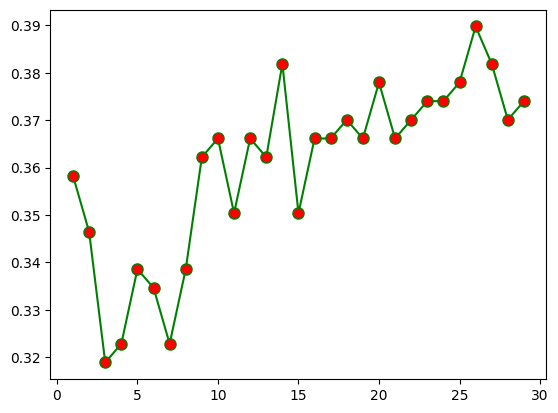

In [23]:
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=8)

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicciones = knn.predict(X_test)

In [27]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

